In [2]:
import datetime
from os import listdir
from os.path import isfile, join
mypath='F:/Data_BachelorHES/start_haas_vf2ss/'
onlyfiles = [join(mypath,f) for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)

['F:/Data_BachelorHES/start_haas_vf2ss/PMPM_RAW_BIN_1m_20241116_085931.csv', 'F:/Data_BachelorHES/start_haas_vf2ss/PMPM_RAW_BIN_1m_20241116_090031.csv', 'F:/Data_BachelorHES/start_haas_vf2ss/PMPM_RAW_BIN_1m_20241116_090131.csv', 'F:/Data_BachelorHES/start_haas_vf2ss/PMPM_RAW_BIN_1m_20241116_090231.csv', 'F:/Data_BachelorHES/start_haas_vf2ss/PMPM_RAW_BIN_1m_20241116_090331.csv', 'F:/Data_BachelorHES/start_haas_vf2ss/PMPM_RAW_BIN_1m_20241116_090431.csv', 'F:/Data_BachelorHES/start_haas_vf2ss/PMPM_RAW_BIN_1m_20241116_090531.csv', 'F:/Data_BachelorHES/start_haas_vf2ss/PMPM_RAW_BIN_1m_20241116_090631.csv', 'F:/Data_BachelorHES/start_haas_vf2ss/PMPM_RAW_BIN_1m_20241116_090731.csv', 'F:/Data_BachelorHES/start_haas_vf2ss/PMPM_RAW_BIN_1m_20241116_090831.csv', 'F:/Data_BachelorHES/start_haas_vf2ss/PMPM_RAW_BIN_1m_20241116_090931.csv', 'F:/Data_BachelorHES/start_haas_vf2ss/PMPM_RAW_BIN_1m_20241116_091031.csv', 'F:/Data_BachelorHES/start_haas_vf2ss/PMPM_RAW_BIN_1m_20241116_091131.csv', 'F:/Data_Ba

In [3]:
filename_Training=onlyfiles[:165]
print(filename_Training[-1])

F:/Data_BachelorHES/start_haas_vf2ss/PMPM_RAW_BIN_1m_20241116_114333.csv


## Import Raw Data to CSV for each sensor

In [4]:
import struct
import numpy as np
import csv
import pandas as pd
ind=0

for file in filename_Training:
    values = []
    print('Reading file:',file)
    
    # Lire le fichier .csv qui contient le flux de bytes
    with open(file, 'rb') as f:
        byte_stream = f.read()  # Lire tout le fichier comme un flux de bytes
    num_values = len(byte_stream) // 2  # Calcul du nombre d'entiers


    for i in range(num_values):
        two_bytes = byte_stream[i*2:(i*2)+2]
        value = struct.unpack('<h', two_bytes)[0]  # '<h' pour 2 bytes en short int
        values.append(value)
        
    npValues=np.array(values, dtype=np.int16)
    if ind==0:
        sound_size=50
        accelX_size=50
        accelY_size=50
        accelZ_size=50
        slice_size=sound_size+accelX_size+accelY_size+accelZ_size
        num_slice = len(npValues)//slice_size # Nombre de tranches
    
        #start_indices=np.concatenate([np.arange(i*slice_size, i*slice_size+start_size) for i in range(num_slice)])
        sound_indices=np.concatenate([np.arange(i*slice_size, i*slice_size+sound_size) for i in range(num_slice)])
        accelX_indices=np.concatenate([np.arange(i*slice_size+sound_size, i*slice_size+sound_size+accelX_size) for i in range(num_slice)])
        accelY_indices=np.concatenate([np.arange(i*slice_size+sound_size+accelX_size, i*slice_size+sound_size+accelX_size+accelY_size) for i in range(num_slice)])
        accelZ_indices=np.concatenate([np.arange(i*slice_size+sound_size+accelX_size+accelY_size, i*slice_size+slice_size) for i in range(num_slice)])
        del sound_size, accelY_size, accelX_size, accelZ_size, slice_size, num_slice
    soundValues=npValues[sound_indices]
    accelXValues=npValues[accelX_indices]
    accelYValues=npValues[accelY_indices]
    accelZValues=npValues[accelZ_indices]
    
    myMeasures ={}
    myMeasures["Sound"]=soundValues.astype(np.int16, casting='safe')
    myMeasures["Accel X"]=accelXValues.astype(np.int16, casting='safe')
    myMeasures["Accel Y"]=accelYValues.astype(np.int16, casting='safe')
    myMeasures["Accel Z"]=accelZValues.astype(np.int16, casting='safe')
    myDfMeas=pd.DataFrame(myMeasures)
    
    myDfMeas.to_csv('F:/Data_BachelorHES/firstDayMeas/sound.csv', columns=["Sound"], index=False, mode='a', header=False)
    myDfMeas.to_csv('F:/Data_BachelorHES/firstDayMeas/accelX.csv', columns=["Accel X"], index=False, mode='a', header=False)
    myDfMeas.to_csv('F:/Data_BachelorHES/firstDayMeas/accelY.csv', columns=["Accel Y"], index=False, mode='a', header=False)
    myDfMeas.to_csv('F:/Data_BachelorHES/firstDayMeas/accelZ.csv', columns=["Accel Z"], index=False, mode='a', header=False)
    ind+=1
    print("Data from file {} written to csv".format(file))
    del soundValues, accelXValues, accelYValues, accelZValues, myMeasures, myDfMeas, byte_stream, value, two_bytes, npValues
del num_values, values, sound_indices, accelX_indices, accelY_indices, accelZ_indices
    
    


Reading file: F:/Data_BachelorHES/start_haas_vf2ss/PMPM_RAW_BIN_1m_20241116_085931.csv


KeyboardInterrupt: 

### Export sound to a wavefile

In [1]:
import pandas as pd
import array
sound = pd.read_csv('F:/Data_BachelorHES/firstDayMeas/sound.csv', header=None, names=['values'])
sound.head()
print(sound.shape)

data_array = array.array('h', sound.values.flatten().astype(int))  # 'h' pour int16 (2 octets par valeur)
del sound

(495000000, 1)


In [10]:
print(np.max(data_array), np.min(data_array))

3098 -32768


In [13]:
import librosa
import numpy as np

data_array_np = np.array(data_array, dtype=np.float32)
data_array_np = data_array_np/32768.0  # Normalisation des valeurs entre -1 et 1
# Fréquence d'échantillonnage d'origine et cible
fs_original = 50000  # 50 kHz
fs_target = 48000    # 48 kHz

# Rééchantillonnage avec librosa
resampled_data = librosa.resample(data_array_np, orig_sr=fs_original, target_sr=fs_target)
print(np.max(resampled_data), np.min(resampled_data))

# Trouver les valeurs maximales et minimales
max_val = resampled_data.max()
min_val = resampled_data.min()

# Renormaliser entre -1 et 1
resampled_array = resampled_data / max(abs(max_val), abs(min_val))
print(np.max(resampled_array), np.min(resampled_array))
del max_val, min_val

0.09442235 -1.003543
0.09408899 -1.0


In [14]:
print(np.max(data_array_np), np.min(data_array_np))

0.09454346 -1.0


In [15]:
from scipy.io.wavfile import write

# Convertir en int16 pour le format WAV
resampled_int16 = (resampled_array * 32767).astype(np.int16)

# Exporter le fichier WAV
write('F:/Data_BachelorHES/firstDayMeas/resampled_audio_exp_scipy.wav', fs_target, resampled_int16)



In [16]:
import soundfile as sf
sf.write('F:/Data_BachelorHES/firstDayMeas/resampled_audio_exp_sf.wav', resampled_array, fs_target, subtype='PCM_16')

In [17]:
# Définir le gain en décibels (par exemple, +20 dB pour multiplier par 10 le volume perçu)
gain_db = 20
amplification_factor = 10 ** (gain_db / 20)

# Appliquer l'amplification
amplified_signal = resampled_array * amplification_factor

# Normaliser si nécessaire
amplified_signal = np.clip(amplified_signal, -1.0, 1.0)

sf.write('F:/Data_BachelorHES/firstDayMeas/resampled_audio_exp_sf_amplified.wav', resampled_array, fs_target, subtype='PCM_16')

In [25]:
import csv
with open("F:/Data_BachelorHES/firstDayMeas/aroundClap_original.csv", mode="w", newline="") as file:
    writer = csv.writer(file)
    
    # Écrire une seule ligne avec les premières valeurs
    writer.writerow(resampled_int16[15276221:15276671])
    #writer.writerow(data_array_np[15129364:15129572])
    

In [24]:
print(resampled_int16[14538750:14538800])

[ -20   60  156  188  138   51    6   36   81   74    8  -62  -77  -30
   25   23  -31  -87 -114 -112  -92  -66  -47  -40  -35  -31  -31  -20
    1   17   -8  -63 -108 -135 -146 -158 -146  -97  -45  -40  -94 -141
 -129  -87  -67 -101 -161 -198 -201 -198]


# Décalage trouvé avec Audacity
Situé le deuxième clap à environ 36 secondes après le début de la vidéo depuis la vidéo. Sur audacity, le pic du clap se trouve à l'échantillon 1'751'944 => @ 48KHz => 36.499s
Ce second clap est plus difficile à situer sur l'enregistrement du microphone. 
Pour réaliser une pré-synchronisation, on  utilisera une séquence de la machine particulièrement reconnaissable, une série de son "haute" fréquence audible à la fois dans l'enregistrement du microphone et dans l'enregistrement de la vidéo. Pour situer ces sons haute fréquences, on visualise les stream audio en spectrogramme dans Audacity. On regarde à quel échantillon approximatif ils commencent dans les deux streams. On calcule le décalage entre les deux streams et on l'applique à l'enregistrement de la vidéo pour synchroniser les deux streams. Cette pré-synchronisation nous donne un décalage de 14'874'177 échantillons (soit 5min 9s 879ms). A partir de là, on sait qu' à ~10'000 échantillons prés (~200ms), nos flux sont synchronisés. 
Après ce décalage, le second clap se trouve à l'échantillon 16'626'121 sur le son de la vidéo.
On repasse ensuite sur la zone du second clap pour tenter d'entendre ce clap sur le son du microphone. Et heureusement on l'entend assez distinctement. Cependant le pic n'est pas aussi marqué que sur l'enregistrement du son de la vidéo. Il s'agit plutôt d'une vague aplatie avec un dizaine d'échantillons de largeur. On peut donc considérer que le clap se situe entre les échantillons 16'627'385 et 16'627'394. On peut donc considérer que le clap se situe au centre de cette vague, soit à l'échantillon 16'627'390. Ainsi le clap du microphone à 16'627'390 et celui de la vidéo à 16'626'121 sont décalés de 1'269 échantillons (soit 26ms).  Le décalage total se porte ainsi à 14'875'446 échantillons (soit 5min 9s 905ms).

Il est intéressant de noter que le pic du clap est aussi décalé entre les deux flux "stéréo" de la vidéo d'environ 7 échantillons. Ce décalage est dû à plusieurs paramêtres: placement des deux micro du téléphone, distance entre le clap et le téléphone, traitement interne du signal par le téléphone (ADC, DSP etc..) etc..  Ainsi on peut déterminer que notre synchronisation est correct avec une tolérance de +/- 100 échantillons. Car le micro de la machine et de la caméra ne sont pas situés au même endroit et que le clap n'est pas un son ponctuel mais un son d'une certaine durée.  

Pour la suite de l'analyse nous jetterons ainsi les échantillons 0 à 14'875'446 de l'enregistrement du son du microphone.
Cependant comme nous avons travaillé avec Audacity sur un projet avec un tx d'échantillonnage à 48kHz, alors que nous avons des valeurs sur 50kHz (14'875'446*50/48), nous devons exclure les échantillons 0 à 15'495'256 pour le microphone et les 3 axes de l'accéléromètre.


Ensuite, lors de l'OCR nous avons dû exclure les frame 0 à 9964 (soit les 9965 premières frames) et que nous avons un temps en millisecondes jusqu'à la frame rate 9965 de 332'245.6 ms, nous devons également exclure les 15'947'789 échantillons suivants (à 48kHz) de l'enregistrement du microphone et du son de la vidéo. Ainsi il faut exclure les enregistrements 0 à 30'823'235 pour le microphone et les 3 axes de l'accéléromètre, ce qui ramené à la fréquence d'échantillonnage originale de 50kHz, correspond à l'échantillon 32'107'536.

 

In [44]:
import csv
mystSound=[]
with open('F:/Data_BachelorHES/firstDayMeas/sound.csv', newline='') as f:
    reader = csv.reader(f)
    mystSound = [row for row in reader]
print(mystSound[:5])

KeyboardInterrupt: 

In [3]:
from scipy.io import wavfile
import scipy.signal as sps
import numpy as np

new_fs=44100

original_fs, original_data = wavfile.read('F:/Data_BachelorHES/firstDayMeas/Sound1611.wav')

number_of_samples = round(original_data.shape[0]*float(new_fs)/original_fs)
data_res=sps.resample(original_data, number_of_samples)



In [14]:


print(sound.values.shape, np.max(sound.values), np.min(sound.values))

(495000000, 1) 3098 -32768


In [ ]:
import sounddevice as sd
sd.play(np.int16(sound["values"].to_numpy()),samplerate=fs)
sd.wait()

In [8]:
print(sound.values[:5])
print(sound.values.shape)
print(sound["values"][:5])
print(sound["values"].to_numpy()[:5])

[[ 6]
 [ 1]
 [ 2]
 [ 3]
 [10]]
(495000000, 1)
0     6
1     1
2     2
3     3
4    10
Name: values, dtype: int64
[ 6  1  2  3 10]


## Import Images from Video

In [3]:
import cv2
print(cv2.__version__)

4.10.0


In [25]:
from PIL import Image
import cv2
import os
import shutil
image_frames='F:/Data_BachelorHES/Video_CNC/images_frames'


def files(image_frames):
    if not os.path.exists(image_frames):
        os.makedirs(image_frames)  
    src_vid=cv2.VideoCapture('F:/Data_BachelorHES/Video_CNC/Video_CNC.mp4')
    return(src_vid)

def processVideo(src_vid):
    count=0
    while src_vid.isOpened():
        ret, frame=src_vid.read()
        if ret:            
            if count>9960:
                if count%5==0:
                    #Save a frame every 5 frame (6frame/s => one frame every 167ms)
                    name='frame'+str(count)+'.jpg'
                    cv2.imwrite(os.path.join(image_frames, name), frame)
            count+=1
        else:
            break
    src_vid.release()
    cv2.destroyAllWindows()
    return(count)


In [61]:
def countVideoFrames(destDir):
    srcVid=files(image_frames)
    count=0
    while srcVid.isOpened():
        ret, frame=srcVid.read()
        if ret:
            lastFrame=frame
            count+=1
            if count%1000==0:
                print('Number of frames processed:', count)
            if count>9960:
                if count%5==0:
                    #Save a frame every 5 frame (6frame/s => one frame every 167ms)
                    name='frame'+str(count)+'.jpg'
                    cv2.imwrite(os.path.join(image_frames, name), frame)
        else:
            break
    lastFrameName='last_frame_'+str(count)+'.png'
    cv2.imwrite(destDir+lastFrameName, lastFrame)
    srcVid.release()
    cv2.destroyAllWindows()
    return count

myNbFrames=countVideoFrames('F:/Data_BachelorHES/Video_CNC/')

Number of frames processed: 1000
Number of frames processed: 2000
Number of frames processed: 3000
Number of frames processed: 4000
Number of frames processed: 5000
Number of frames processed: 6000
Number of frames processed: 7000
Number of frames processed: 8000
Number of frames processed: 9000
Number of frames processed: 10000
Number of frames processed: 11000
Number of frames processed: 12000
Number of frames processed: 13000
Number of frames processed: 14000
Number of frames processed: 15000
Number of frames processed: 16000
Number of frames processed: 17000
Number of frames processed: 18000
Number of frames processed: 19000
Number of frames processed: 20000
Number of frames processed: 21000
Number of frames processed: 22000
Number of frames processed: 23000
Number of frames processed: 24000
Number of frames processed: 25000
Number of frames processed: 26000
Number of frames processed: 27000
Number of frames processed: 28000
Number of frames processed: 29000
Number of frames proces

In [57]:
src_vid=files(image_frames)
nb_frames=processVideo(src_vid)


KeyboardInterrupt



## Map the frames to the corresponding samples for microphone and accelerometer

In [3]:
import cv2
video_path = 'F:/Data_BachelorHES/Video_CNC/Video_CNC.mp4'
cap = cv2.VideoCapture(video_path)

In [6]:
class FrameInfo:
    def __init__(self, frame_number, time_in_milliseconds, measCount, measLowIndex, HighIndex):
        self.frame_number = frame_number
        self.time_in_milliseconds = time_in_milliseconds
        self.measCount=measCount
        self.measLowIndex=measLowIndex
        self.HighIndex=HighIndex
    
    def __repr__(self):
        return f"Frame {self.frame_number} at {self.time_in_milliseconds} ms with {self.measCount} measurements at index {self.measLowIndex} to {self.HighIndex}"
    
    def getNbMeas(self):
        return self.measCount
    def getMeasIndex(self):
        return (self.measLowIndex, self.HighIndex)

In [13]:

frameData=[]

count=9965
cap.set(cv2.CAP_PROP_POS_FRAMES, count)
cap.read()
while cap.isOpened():
        
    actualTime=cap.get(cv2.CAP_PROP_POS_MSEC)
    cap.set(cv2.CAP_PROP_POS_FRAMES, count+5)
    
    ret, frame = cap.read()
    if not ret:
        frameData.append(FrameInfo(count, actualTime, 0, highIndex, highIndex))
        print("End of stream ... Exiting ...")
        break
    
   
    nextTime=cap.get(cv2.CAP_PROP_POS_MSEC)
    lowIndex=15495256 + int(actualTime*50)
    highIndex=15495256 + int(nextTime*50)
    totMeas=highIndex-lowIndex
    frameData.append(FrameInfo(count, actualTime, totMeas, lowIndex, highIndex))
    count+=5

End of stream ... Exiting ...


In [5]:
count=285545
cap.set(cv2.CAP_PROP_POS_FRAMES, count)
cap.read()
print(cap.get(cv2.CAP_PROP_POS_MSEC))

9520340.066666668


In [4]:
import cv2
# Charger la vidéo
video_path = 'F:/Data_BachelorHES/Video_CNC/Video_CNC.mp4'
cap = cv2.VideoCapture(video_path)

# Récupérer le frame rate (FPS)
fps = cap.get(cv2.CAP_PROP_FPS)

In [9]:
duration=3001/90000
totMeasurements=int(duration*50000)
lowIndex=15495256 + int(frameData[-1].time_in_milliseconds*50)
highIndex=lowIndex+totMeasurements
frameData[-1].measCount=totMeasurements
frameData[-1].measLowIndex=lowIndex
frameData[-1].HighIndex=highIndex


In [16]:
del highIndex, lowIndex, totMeasurements, duration, count, cap, f, video_path

In [20]:
print(frameData[-1])
print(frameData.__len__())

Frame 285545 at 9520340.066666668 ms with 1667 measurements at index 491512259 to 491513926
55117


In [11]:
#Save the table of FrameInfo objects using pickle
import pickle

# Sauvegarder la liste dans un fichier
with open('F:/Data_BachelorHES/Video_CNC/frameData.pkl', 'wb') as f:
    pickle.dump(frameData, f)



In [19]:
#Load the pickle file containing the list of FrameInfo objects
import pickle

# Load the list of frames and there respectives infos from the file
with open('F:/Data_BachelorHES/Video_CNC/frameData.pkl', 'rb') as f:
    frameData = pickle.load(f)
del f

In [ ]:
soundPath='F:/Data_BachelorHES/firstDayMeas/sound.csv'
accelXPath='F:/Data_BachelorHES/firstDayMeas/accelX.csv'
accelYPath='F:/Data_BachelorHES/firstDayMeas/accelY.csv'
accelZPath='F:/Data_BachelorHES/firstDayMeas/accelZ.csv'

with open(soundPath, newline='') as f:
    reader = csv.reader(f)
    sound = [row for row in reader]
 

In [37]:
DfImportParquet=pd.read_parquet('F:/Data_BachelorHES/Video_CNC/OCR_Program_Match_LabelledData.parquet', engine='pyarrow')
DfImportParquet['Line_Text_OCR']=DfImportParquet['Line_Text_OCR'].apply(lambda x: x.tolist())   

In [23]:
import pandas as pd
import array
sound = pd.read_csv(soundPath, header=None, names=['values'])
accelX = pd.read_csv(accelXPath, header=None, names=['values'])
accelY = pd.read_csv(accelYPath, header=None, names=['values'])
accelZ = pd.read_csv(accelZPath, header=None, names=['values'])
print(sound.shape, accelX.shape, accelY.shape, accelZ.shape)

sound_array = array.array('h', sound.values.flatten().astype(int))  # 'h' pour int16 (2 octets par valeur)
accelX_array=array.array('h', accelX.values.flatten().astype(int))
accelY_array=array.array('h', accelY.values.flatten().astype(int))
accelZ_array=array.array('h', accelZ.values.flatten().astype(int))

del sound, accelX, accelY, accelZ, accelXPath, accelYPath, accelZPath, soundPath


(495000000, 1) (495000000, 1) (495000000, 1) (495000000, 1)


In [40]:
myDataStreams={}
myDataStreams['frame']=[]
myDataStreams['frame_time_ms']=[]
myDataStreams['frame_duration_ms']=[]
myDataStreams['Data_points']=[]
myDataStreams["Sound"]=[]
myDataStreams["Accel X"]=[]
myDataStreams["Accel Y"]=[]
myDataStreams["Accel Z"]=[]
myDataStreams['Label_Program_Line']=[]
myDataStreams['Label_Op_Name']=[]
myDataStreams['Label_Tool_Name']=[]

for i, frame in enumerate(frameData):
    myDataStreams['frame'].append(frameData[i].frame_number)
    myDataStreams['frame_time_ms'].append(frameData[i].time_in_milliseconds)
    myDataStreams['frame_duration_ms'].append(frameData[i].measCount/50)
    myDataStreams['Data_points'].append(frameData[i].measCount)
    myDataStreams["Sound"].append(sound_array[frameData[i].measLowIndex:frameData[i].HighIndex].tolist())
    myDataStreams["Accel X"].append(accelX_array[frameData[i].measLowIndex:frameData[i].HighIndex].tolist())
    myDataStreams["Accel Y"].append(accelY_array[frameData[i].measLowIndex:frameData[i].HighIndex].tolist())
    myDataStreams["Accel Z"].append(accelZ_array[frameData[i].measLowIndex:frameData[i].HighIndex].tolist())
    myDataStreams['Label_Program_Line'].append(DfImportParquet['Line_Text_Program'][i])
    myDataStreams['Label_Op_Name'].append(DfImportParquet['Op_Name'][i])
    myDataStreams['Label_Tool_Name'].append(DfImportParquet['Tool_Name'][i])


myDf=pd.DataFrame.from_dict(myDataStreams)
    

In [41]:
import pyarrow as pa 
import pyarrow.parquet as pq

myDataset=pa.Table.from_pandas(myDf)
pq.write_table(myDataset, 'F:/Data_BachelorHES/DataSet_CNC/CNC_Labelled_Data.parquet')
del myDataset

## Define various sharpening methods to apply to image

In [1]:
# Unsharp mask method
def unsharp_mask(image, sigma=1.0, strength=1.5):
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    sharpened = cv2.addWeighted(image, 1.0 + strength, blurred, -strength, 0)
    return sharpened

In [2]:
#Unsharp mask Laplacian
def unsharp_mask_laplacian(image, sigma=1.0, strength=1.5, kernel_size=(3,3)):
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = cv2.addWeighted(image, 1.0 + strength, blurred, -strength, 0)
    return sharpened

In [3]:
#Sharpening using high-pass filter
def high_pass_filter(image, sigma=1.0):
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    high_pass=cv2.subtract(image, blurred)
    sharpened=cv2.addWeighted(image, 1.0, high_pass, 1.0, 0)
    return sharpened

In [63]:
def preprocess_with_closing_opening(image, kernel_size=(3,3)):
    """
    Preprocess the image by applying morphological closing followed by opening.
    """
    # Morphological Closing: Fill gaps within characters
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,kernel_size)
    closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations=1)
    
    # Morphological Opening: Remove noise
    opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel, iterations=1)
    #opening=closing.copy()
    return opening

In [5]:

import numpy as np
def processImage(path_to_image):
    pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract.exe'
    image=cv2.imread(path_to_image)
    #Converting image to gray level
    gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
   
    #Improve contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_gray=clahe.apply(gray)
    
    #Apply adaptive thresholding
    treshImage=cv2.adaptiveThreshold(clahe_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    cv2.imwrite('F:/Data_BachelorHES/Video_CNC/mytest.jpg', treshImage)
    kernel = np.ones((1,1),np.uint8)
    opening = cv2.morphologyEx(treshImage,cv2.MORPH_OPEN,kernel, iterations = 2)
    cv2.imwrite('F:/Data_BachelorHES/Video_CNC/mytest_open.jpg', opening)
    contours, hierarchy = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    print('Number of contours:', len(contours))
    imContour=opening.copy()
    imContour = cv2.cvtColor(imContour, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(imContour, contours, -1, (255,0,0), thickness=1)
    cv2.imwrite('F:/Data_BachelorHES/Video_CNC/mytest_cont.jpg', imContour)
    
    largeContours, hierarchy = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    imContour2=opening.copy()
    imContour2 = cv2.cvtColor(imContour2, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(imContour2, largeContours, -1, (255,0,0), thickness=1)
    cv2.imwrite('F:/Data_BachelorHES/Video_CNC/mytest_cont_2.jpg', imContour2)
    
    myImage=cv2.cvtColor(opening.copy(), cv2.COLOR_GRAY2BGR)
    #Iterating over contours to detect potential bounding boxes
    potential_boxes=[]
    
    for contour in contours:
        (x,y,w,h) = cv2.boundingRect(contour)
        if w>50 and h>10 and w<250 and h<20:
            cv2.rectangle(myImage, (x,y), (x+w, y+h), (0,255,0), 2)
            potential_boxes.append((x,y,w,h))
            
    #Save image with potential bounding boxes
    cv2.imwrite('F:/Data_BachelorHES/Video_CNC/mytest_Large.jpg', myImage)
    
    
    mybox=0 
    for (x,y,w,h) in potential_boxes:
        mybox+=1
        roi=opening[y:y+h, x:x+w]
        config=('-l eng --oem 1 --psm 7')
        cv2.putText(myImage,str(mybox), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,255), 2)
        text=pytesseract.image_to_string(roi, config=config)
        print('Box number : ', mybox, 'Text:', text)
    cv2.imwrite('F:/Data_BachelorHES/Video_CNC/mytest_num.jpg', myImage)
    cv2.destroyAllWindows()
    return

processImage('F:/Data_BachelorHES/Video_CNC/images_frames/frame18000.jpg')  
""" 
    for i in range(nb_frames//18000):
        img=Image.open(image_frames+'/frame'+str(i*18000)+'.jpg')
        text=pytesseract.image_to_string(img)
        op.append(text)
        print('Text from frame', i*18000, ':', text)
    return(op)"""

NameError: name 'pytesseract' is not defined

In [127]:
def fineImageProcess(path_to_image, frameNb):
    #Define path to tesseract
    pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract.exe'
    
    #load Image
    originalImage = cv2.imread(path_to_image)
    
    #Convert to grayscale
    gray=cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('F:/Data_BachelorHES/Video_CNC/Preprocessing/gray_img.jpg', gray)
    #Apply CLAHE to improve contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_gray=clahe.apply(gray)
    cv2.imwrite('F:/Data_BachelorHES/Video_CNC/Preprocessing/Clahe_img.jpg', clahe_gray)
    #Apply adaptive thresholding
    threshImage=cv2.adaptiveThreshold(clahe_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    cv2.imwrite('F:/Data_BachelorHES/Video_CNC/Preprocessing/Threshold_img.jpg', threshImage)
    
    #Apply morphological opening / closing
    cleanedImage=preprocess_with_closing_opening(threshImage,(1,1))
    
    #Find contours and save a copy with green contours
    contours, hierarchy = cv2.findContours(cleanedImage, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    print('Number of contours:', len(contours))
    contourImage = cv2.cvtColor(cleanedImage, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(contourImage, contours, -1, (0,255,0), thickness=1)
    cv2.imwrite('F:/Data_BachelorHES/Video_CNC/Preprocessing/Contours_img.jpg', contourImage)
    
    processedImage=cv2.cvtColor(cleanedImage.copy(), cv2.COLOR_GRAY2BGR)
    #Iterating over contours to detect potential bounding boxes
    potential_boxes=[]
    
    for contour in contours:
        (x,y,w,h) = cv2.boundingRect(contour)
        #if w>50 and h>10 and w<250 and h<20:
        #if w>230 and h>250 and w<290 and h<300: 
        if w>50 and h>20 and x>300 and x<800 and y<500 and y>5:
            aspect_ratio=h/float(w)
        
            if y<140 and x>370 and x<420 and w>230 and h>250: 
            #Draw relevant bounding boxes on image
                cv2.rectangle(processedImage, (x,y), (x+w, y+h), (0,0,255), 2)
                area = w*h
                if len(potential_boxes)>0 :
                    if area<=potential_boxes[-1][2]*potential_boxes[-1][3]:
                       potential_boxes[-1]=(x,y,w,h)
                else:
                    potential_boxes.append((x,y,w,h))
    cv2.imwrite('F:/Data_BachelorHES/Video_CNC/Preprocessed/RawProcessedContours_Image.jpg', processedImage)
    myX, myY, myW, myH=potential_boxes[-1] 
    cv2.rectangle(processedImage, (myX, myY), (myX+myW, myY+myH), (0,255,0), 2)
    #Save image with potential bounding boxes
    cv2.imwrite('F:/Data_BachelorHES/Video_CNC/Preprocessed/FinedProcessedContours_Image.jpg', processedImage)
    
    #Do OCR on potential bounding boxes
    text=[]
    for idx,(x,y,w,h) in enumerate(potential_boxes):
        roi=cleanedImage[y:y+h, x:x+w]
        
        #preprocess ROI for better OCR quality
        roi=cv2.resize(roi, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
        roi=cv2.GaussianBlur(roi, (5,5), 0) #reduce noise inside the ROI
        ret, roi = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        #Process bounding box and display recognized characters
        config=('-l eng --oem 1 --psm 7')
        text.append(pytesseract.image_to_string(roi, config=config).strip())
        print('Box number : ', idx+1, 'Text:', text[idx], 'Box coordinate : (', x, y, w, h, ')')
        
        #Edit image to show bounding box and number of bounding boxes
        cv2.putText(processedImage,str(idx+1), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,255), 2)
        cv2.rectangle(processedImage, (x,y), (x+w, y+h), (255,0,0), 2)
    cv2.imwrite('F:/Data_BachelorHES/Video_CNC/processed_img_{}_box{}.jpg'.format(frameNb, 1), processedImage)
    cv2.destroyAllWindows()
    
fineImageProcess('F:/Data_BachelorHES/Video_CNC/images_frames/frame18000.jpg',1)  
    
    

Number of contours: 25174
Box number :  1 Text:  Box coordinate : ( 385 13 251 271 )


In [64]:
def preprocessContours(myImagePath, frameNb, destinationCorrDir='F:/Data_BachelorHES/Video_CNC/Preprocessed/', destinationWrongDir='F:/Data_BachelorHES/Video_CNC/Preprocessed/ToBeManuallyCropped/'):
        #Define path to tesseract
    pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract.exe'
    
    #load Image
    originalImage = cv2.imread(myImagePath)
    
    #Convert to grayscale
    gray=cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(destinationCorrDir+'Gray_img.jpg', gray)
    #Apply CLAHE to improve contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_gray=clahe.apply(gray)
    cv2.imwrite(destinationCorrDir+'Clahe_img.jpg', clahe_gray)
    #Apply adaptive thresholding
    threshImage=cv2.adaptiveThreshold(clahe_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    cv2.imwrite(destinationCorrDir+'Thresh_img.jpg', threshImage)
    
    #Apply morphological opening / closing
    cleanedImage=preprocess_with_closing_opening(threshImage,(1,1))
    
    #Find contours and save a copy with green contours
    contours, hierarchy = cv2.findContours(cleanedImage, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    processedImage=cv2.cvtColor(cleanedImage.copy(), cv2.COLOR_GRAY2BGR)
    contourImage=cv2.drawContours(processedImage, contours, -1, (0,255,0), thickness=1)
    cv2.imwrite(destinationCorrDir+'Contour_img.jpg', contourImage)    
    #Iterating over contours to detect potential bounding boxes
    potential_boxes=[]
    for contour in contours:
        (x,y,w,h) = cv2.boundingRect(contour)

        if w>50 and h>20 and x>300 and x<800 and y<500 and y>0: 
            if y<140 and x>370 and x<420 and w>230 and h>250: 
            #Draw relevant bounding boxes on image
                area = w*h
                if len(potential_boxes)>0 :
                    if area<=potential_boxes[-1][2]*potential_boxes[-1][3]:
                        potential_boxes[-1]=(x,y,w,h)
                else:
                    potential_boxes.append((x,y,w,h))
    if len(potential_boxes)>0 :
        myX, myY, myW, myH=potential_boxes[-1] 
        cv2.imwrite('{}cropped_frame_{}.jpg'.format(destinationCorrDir,frameNb), originalImage[myY:myY+myH, myX:myX+myW])
        #print('Image nb : ', frameNb, ' saved !')
    else: 
        cv2.imwrite('{}uncropped_frame_{}.jpg'.format(destinationWrongDir, frameNb), originalImage)
        print('No potential bounding box found ! for image :', myImagePath)


preprocessContours('F:/Data_BachelorHES/Video_CNC/images_frames/frame131175.jpg', 131175, destinationCorrDir='F:/Data_BachelorHES/Video_CNC/Preprocessed/', destinationWrongDir='F:/Data_BachelorHES/Video_CNC/Preprocessed/ToBeManuallyCropped/')
    
    

In [133]:
from os import listdir
from os.path import isfile, join
mypath='F:/Data_BachelorHES/Video_CNC/images_frames/'
onlyfiles = [join(mypath,f) for f in listdir(mypath) if isfile(join(mypath, f))]

for f in range(10000,55113):
    myfileNb=onlyfiles[f].split('.')[0]
    myfileNb=int(myfileNb.split('e')[-1])
    if f%1000==0:
        print('Processing file:', myfileNb)
    preprocessContours(onlyfiles[f], myfileNb)

Processing file: 145460
Processing file: 150005
Processing file: 154550
Processing file: 15910
Processing file: 163650
Processing file: 16820
No potential bounding box found ! for image : F:/Data_BachelorHES/Video_CNC/images_frames/frame17230.jpg
No potential bounding box found ! for image : F:/Data_BachelorHES/Video_CNC/images_frames/frame17235.jpg
No potential bounding box found ! for image : F:/Data_BachelorHES/Video_CNC/images_frames/frame17240.jpg
Processing file: 172745
Processing file: 177290
Processing file: 181835
Processing file: 186380
Processing file: 190925
No potential bounding box found ! for image : F:/Data_BachelorHES/Video_CNC/images_frames/frame19420.jpg
No potential bounding box found ! for image : F:/Data_BachelorHES/Video_CNC/images_frames/frame19425.jpg
No potential bounding box found ! for image : F:/Data_BachelorHES/Video_CNC/images_frames/frame19430.jpg
No potential bounding box found ! for image : F:/Data_BachelorHES/Video_CNC/images_frames/frame19435.jpg
No 

In [138]:
import pandas as pd 

mypath='F:/Data_BachelorHES/Video_CNC/myCroppedImages/'
onlyfiles = [join(mypath,f) for f in listdir(mypath) if isfile(join(mypath, f))]
imageDf = pd.DataFrame()
frameNb=[]
width=[]
height=[]
for f in onlyfiles:    
    myfileNb=f.split('.')[0]        
    myfileNb=int(myfileNb.split('_')[-1])
    frameNb.append(myfileNb)
    originalImage = cv2.imread(f)
    width.append(originalImage.shape[1])
    height.append(originalImage.shape[0])
imageDf['frameNb']=frameNb
imageDf['width']=width
imageDf['height']=height    

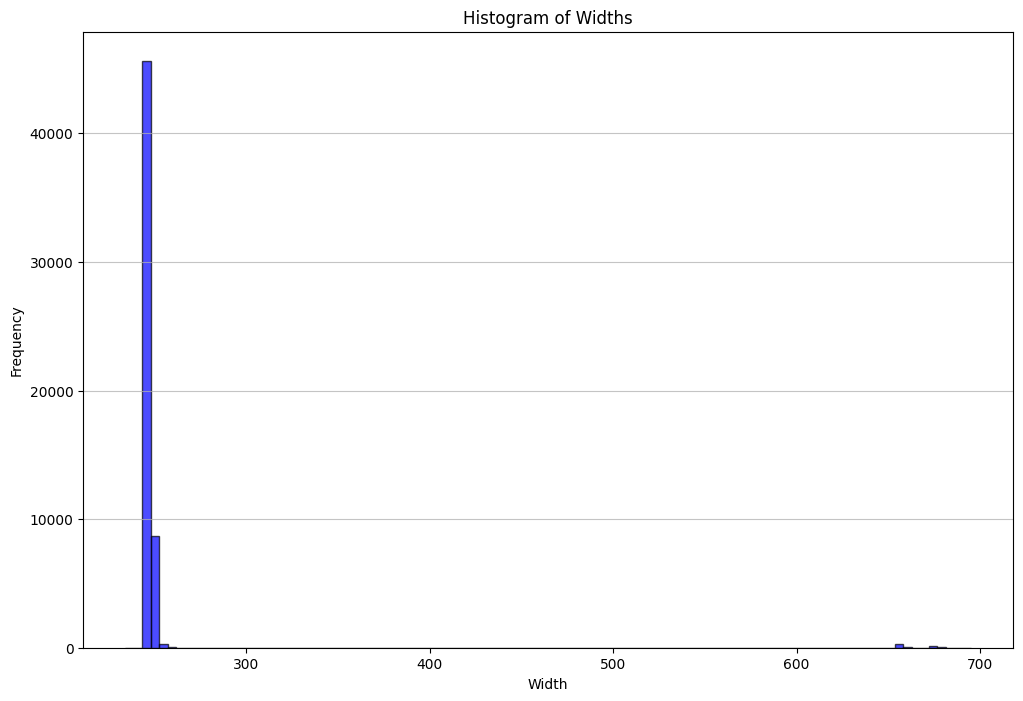

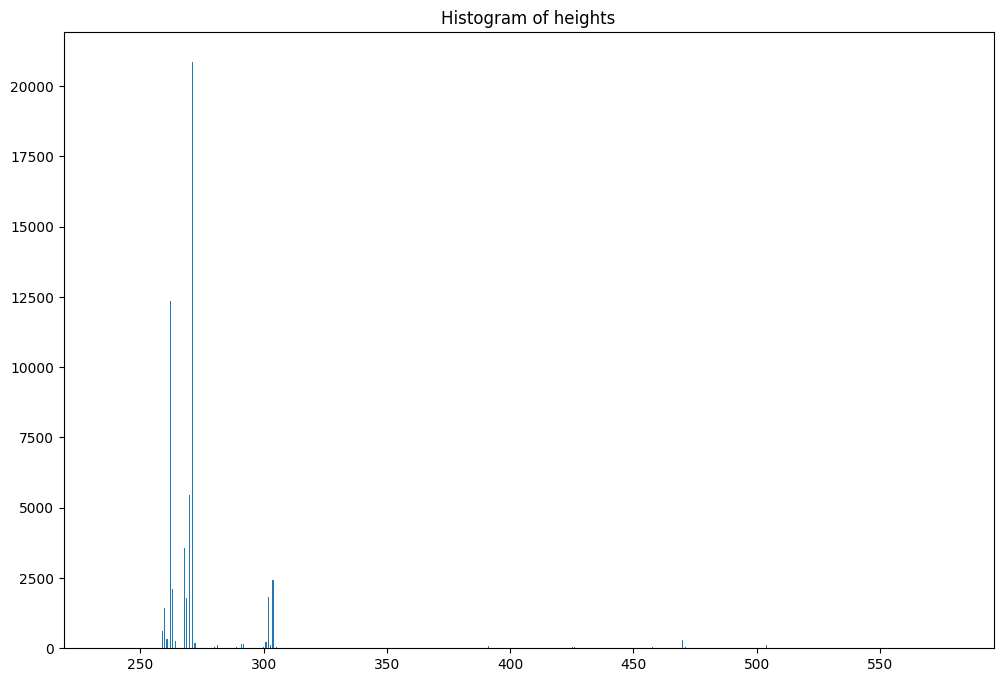

In [144]:
import matplotlib.pyplot as plt

widths = imageDf['width'].to_numpy()  
heights=imageDf['height'].to_numpy()

# Plotting histogram for widths
plt.figure(figsize=(12, 8), facecolor='white')
plt.hist(widths, bins=100, alpha=0.7, color='blue', edgecolor='black')
plt.title("Histogram of Widths")
plt.xlabel("Width")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()


plt.figure(figsize=(12, 8))
plt.hist(heights, bins=100)  
plt.title("Histogram of heights")
plt.show()

In [179]:
binsW=np.linspace(imageDf['width'].min(), imageDf['width'].max(), 100)
imageDf['width_bin']=pd.cut(imageDf['width'], bins=binsW)
myHistoW=[imageDf['width_bin'].value_counts().sort_index()]
print(myHistoW)

binsH=np.linspace(imageDf['height'].min(), imageDf['height'].max(), 100)
imageDf['height_bin']=pd.cut(imageDf['height'], bins=binsH)
myHistoH=[imageDf['height_bin'].value_counts().sort_index()]
print(myHistoH)



[width_bin
(234.0, 238.657]          1
(238.657, 243.313]       17
(243.313, 247.97]     45622
(247.97, 252.626]      8663
(252.626, 257.283]      266
                      ...  
(671.717, 676.374]      131
(676.374, 681.03]        41
(681.03, 685.687]         1
(685.687, 690.343]        1
(690.343, 695.0]          1
Name: count, Length: 99, dtype: int64]
[height_bin
(236.0, 239.465]      3
(239.465, 242.929]    2
(242.929, 246.394]    1
(246.394, 249.859]    0
(249.859, 253.323]    0
                     ..
(561.677, 565.141]    1
(565.141, 568.606]    0
(568.606, 572.071]    0
(572.071, 575.535]    0
(575.535, 579.0]      1
Name: count, Length: 99, dtype: int64]


In [147]:
myWrongImage=imageDf[imageDf['width']>267]

In [149]:
myPath= 'F:/Data_BachelorHES/Video_CNC/myCroppedImages/' 
myFileName='cropped_frame_'
myPath=myPath+myFileName
myFilesToProcess=[myPath+str(f)+'.jpg' for f in myWrongImage['frameNb'].to_numpy()]


In [151]:
import os
import shutil
destinationDir='F:/Data_BachelorHES/Video_CNC/Images_ToBeRecropped/'
for file_path in myFilesToProcess:
    try:
        shutil.move(file_path, destinationDir)  # Move file to the destination
        print(f"Moved: {file_path} to {destinationDir}")
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"Error moving file {file_path}: {e}")

Error moving file F:/Data_BachelorHES/Video_CNC/myCroppedImages/cropped_frame_114140.jpg: Destination path 'F:/Data_BachelorHES/Video_CNC/Images_ToBeRecropped/cropped_frame_114140.jpg' already exists
Error moving file F:/Data_BachelorHES/Video_CNC/myCroppedImages/cropped_frame_114145.jpg: Destination path 'F:/Data_BachelorHES/Video_CNC/Images_ToBeRecropped/cropped_frame_114145.jpg' already exists
Error moving file F:/Data_BachelorHES/Video_CNC/myCroppedImages/cropped_frame_119185.jpg: Destination path 'F:/Data_BachelorHES/Video_CNC/Images_ToBeRecropped/cropped_frame_119185.jpg' already exists
Error moving file F:/Data_BachelorHES/Video_CNC/myCroppedImages/cropped_frame_19575.jpg: Destination path 'F:/Data_BachelorHES/Video_CNC/Images_ToBeRecropped/cropped_frame_19575.jpg' already exists
Error moving file F:/Data_BachelorHES/Video_CNC/myCroppedImages/cropped_frame_19580.jpg: Destination path 'F:/Data_BachelorHES/Video_CNC/Images_ToBeRecropped/cropped_frame_19580.jpg' already exists
Erro

In [27]:
def processingCroppedImages(myImagePath,frameNb, destinationCorrDir, destinationWrongDir):
            #Define path to tesseract
    pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract.exe'
    
    #load Image in grayScale
    originalImage = cv2.imread(myImagePath, cv2.IMREAD_GRAYSCALE)
    
    #Apply scaling of the image
    #Apply CLAHE to improve contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    claheImg=clahe.apply(originalImage)
    
    #Apply adaptive thresholding
    threshImage=cv2.adaptiveThreshold(claheImg, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    
    #Apply morphological opening / closing
    cleanedImage=preprocess_with_closing_opening(threshImage,(1,1))
    
        #Find contours and save a copy with green contours
    contours, hierarchy = cv2.findContours(cleanedImage, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    processedImage=cv2.cvtColor(cleanedImage.copy(), cv2.COLOR_GRAY2BGR)
    #Iterating over contours to detect potential bounding boxes
    potential_boxes=[]
    for contour in contours:
        (x,y,w,h) = cv2.boundingRect(contour)
        cv2.rectangle(processedImage, (x,y), (x+w, y+h), (0,255,0), 2)  
        if y<70 and x<70 and w>20 and h>20: 
            cv2.rectangle(processedImage, (x,y), (x+w, y+h), (0,0,255), 2)    
            #Draw relevant bounding boxes on image
            area = w*h
            if len(potential_boxes)>0 :
                if area<=potential_boxes[-1][2]*potential_boxes[-1][3]:
                    potential_boxes[-1]=(x,y,w,h)
            else:
                potential_boxes.append((x,y,w,h))
    #colorImage=cv2.imread(myImagePath)
    if len(potential_boxes)>0 :
        myX, myY, myW, myH=potential_boxes[-1] 
        cv2.imwrite('{}cropped_frame_{}.jpg'.format(destinationCorrDir,frameNb), processedImage[myY:myY+myH, myX:myX+myW])
        #print('Image nb : ', frameNb, ' saved !')
    else: 
        cv2.imwrite('{}uncropped_frame_{}.jpg'.format(destinationWrongDir, frameNb), processedImage)
        print('No potential bounding box found ! for image :', myImagePath)
    
#processingCroppedImages('F:/Data_BachelorHES/Video_CNC/Images_ToBeRecropped/cropped_frame_244305.jpg', 244305,destinationCorrDir='F:/Data_BachelorHES/Video_CNC/Images_ToBeRecropped/Recropped/', destinationWrongDir='F:/Data_BachelorHES/Video_CNC/Images_ToBeRecropped/NotRecropped/')

In [168]:
mypath='F:/Data_BachelorHES/Video_CNC/Images_ToBeRecropped/'
onlyfiles = [join(mypath,f) for f in listdir(mypath) if isfile(join(mypath, f))]

for f in range(0,490):
    myfileNb=onlyfiles[f].split('.')[0]
    myfileNb=int(myfileNb.split('_')[-1])
    if f%20==0:
        print('Processing file:', onlyfiles[f])
    processingCroppedImages(onlyfiles[f], myfileNb,destinationCorrDir='F:/Data_BachelorHES/Video_CNC/Images_ToBeRecropped/Recropped/', destinationWrongDir='F:/Data_BachelorHES/Video_CNC/Images_ToBeRecropped/NotRecropped/')

Processing file: F:/Data_BachelorHES/Video_CNC/Images_ToBeRecropped/cropped_frame_114140.jpg
Processing file: F:/Data_BachelorHES/Video_CNC/Images_ToBeRecropped/cropped_frame_269635.jpg
Processing file: F:/Data_BachelorHES/Video_CNC/Images_ToBeRecropped/cropped_frame_270615.jpg
Processing file: F:/Data_BachelorHES/Video_CNC/Images_ToBeRecropped/cropped_frame_270965.jpg
Processing file: F:/Data_BachelorHES/Video_CNC/Images_ToBeRecropped/cropped_frame_271340.jpg
Processing file: F:/Data_BachelorHES/Video_CNC/Images_ToBeRecropped/cropped_frame_272050.jpg
Processing file: F:/Data_BachelorHES/Video_CNC/Images_ToBeRecropped/cropped_frame_272570.jpg
Processing file: F:/Data_BachelorHES/Video_CNC/Images_ToBeRecropped/cropped_frame_273165.jpg
Processing file: F:/Data_BachelorHES/Video_CNC/Images_ToBeRecropped/cropped_frame_273395.jpg
Processing file: F:/Data_BachelorHES/Video_CNC/Images_ToBeRecropped/cropped_frame_273665.jpg
Processing file: F:/Data_BachelorHES/Video_CNC/Images_ToBeRecropped/cr

In [29]:
def autoFixedCrop(ImagePath, myImageName, destDir, width, height):
    myImSrc=ImagePath+myImageName
    print(myImSrc)
    myImDst=destDir+myImageName
    image = cv2.imread(myImSrc)
    if image.shape[0]<height:
        height=image.shape[0]
    if image.shape[1]<width:
        width=image.shape[1]
        
    croppedImg=image[0:height, 0:width]
    cv2.imwrite(myImDst, croppedImg)
    return croppedImg
    
    

In [ ]:
mypath='F:/Data_BachelorHES/Video_CNC/Images_ToBeRecropped/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

for f in onlyfiles:
    myCroppedImg=autoFixedCrop(mypath, f,destDir='F:/Data_BachelorHES/Video_CNC/Images_ToBeRecropped/Recropped/',width=247,height=271)
    

## OCR on Images
### OCR with pyTesseract on cropped images


In [205]:
 def OCRonCroppedImages(myImagePath, myImageName, destIntermedDir):
    #Prepare image Name for testing
    myImageNameRaw=myImageName.split('.')[0]
    
    
    #Define path to tesseract
    pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract.exe'
    
    #load Image in grayScale
    originalImage = cv2.imread(myImagePath+myImageName, cv2.IMREAD_GRAYSCALE)
    
    #Apply scaling of the image
    #Apply CLAHE to improve contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    claheImg=clahe.apply(originalImage)
    
    #Apply adaptive thresholding
    threshImage=cv2.adaptiveThreshold(claheImg, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    
    #Apply morphological opening / closing
    cleanedImage=preprocess_with_closing_opening(threshImage,(1,1))
    
        #Find contours and save a copy with green contours
    contours, hierarchy = cv2.findContours(cleanedImage, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    cleanedImage=cv2.cvtColor(cleanedImage, cv2.COLOR_GRAY2BGR)
    
     #Iterating over contours to detect potential bounding boxes
    potential_boxes=[]
    for contour in contours:
        (x,y,w,h) = cv2.boundingRect(contour)
        cv2.rectangle(cleanedImage, (x,y), (x+w, y+h), (0,255,0), 2)  
        if w>20 and h>5: 
            cv2.rectangle(cleanedImage, (x,y), (x+w, y+h), (0,0,255), 2)    
            #Draw relevant bounding boxes on image
            area = w*h
            if len(potential_boxes)>0 :
                if area<=potential_boxes[-1][2]*potential_boxes[-1][3]:
                    potential_boxes[-1]=(x,y,w,h)
            else:
                potential_boxes.append((x,y,w,h))
    (x,y,w,h)=potential_boxes[-1]
    cv2.rectangle(originalImage, (x,y), (x+w, y+h), (255,0,0), 2)
    cv2.imwrite('{}boxes_{}'.format(destIntermedDir, myImageName), originalImage)
    
    text=[]
    for idx,(x,y,w,h) in enumerate(potential_boxes):
        roi=cv2.cvtColor(cleanedImage[y:y+h, x:x+w], cv2.COLOR_BGR2GRAY)
        
        #preprocess ROI for better OCR quality
        roi=cv2.resize(roi, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
        roi=cv2.GaussianBlur(roi, (5,5), 0) #reduce noise inside the ROI
        ret, roi = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        #Process bounding box and display recognized characters
        config=('-l fra --oem 1 --psm 7')
        text.append(pytesseract.image_to_string(roi, config=config).strip())
        print('Box number : ', idx+1, '   \nText:', text[idx], '    \nBox coordinate : (', x, y, w, h, ')')

OCRonCroppedImages('F:/Data_BachelorHES/Video_CNC/myCroppedImages/', 'cropped_frame_10350.jpg', 'F:/Data_BachelorHES/Video_CNC/myCroppedImages/IntermediaryImages/')    


Box number :  1    
Text: Ma     
Box coordinate : ( 39 22 25 7 )


## OCR using PaddleOCR


In [208]:
#pip install paddleocr --user

### First Test on whole image without preprocessing

In [28]:
from paddleocr import PaddleOCR, draw_ocr
import cv2
import numpy as np

def paddleOCR(myImagePath, myImageName, destIntermedDir, myIntermImg=[]):
    srcImg=myImagePath+myImageName
    '''srcImg=cv2.imread(srcImg, cv2.IMREAD_GRAYSCALE)
    
    
        #Apply scaling of the image
    #Apply CLAHE to improve contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    claheImg=clahe.apply(srcImg)
    cv2.imwrite(destIntermedDir+'1_claheImg.png', claheImg)
    #Apply adaptive thresholding
    threshImage=cv2.adaptiveThreshold(claheImg, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 5)
    cv2.imwrite(destIntermedDir+'2_ThreshImg.png', threshImage)


    
    #Apply morphological opening / closing
    scalePercent = 200  # Agrandir à 200%
    width = int(threshImage.shape[1] * scalePercent / 100)
    height = int(threshImage.shape[0] * scalePercent / 100)
    cleanedImage=cv2.resize(threshImage, (width,height), interpolation=cv2.INTER_LINEAR)
    cleanedImage=preprocess_with_closing_opening(cleanedImage,(1,1))    
    #cleanedImage = cv2.medianBlur(cleanedImage, 1)
    cleanedImage=cv2.cvtColor(cleanedImage, cv2.COLOR_GRAY2BGR)
    cv2.imwrite(destIntermedDir+'3_CleanedImg.png',cleanedImage)
    '''
    
    
    
    
    ocr=PaddleOCR(use_angle_cls=True, lang='en') # need to run only once to download and load model into memory
    
    results=ocr.ocr(srcImg, cls=True)
    print(results)
    for line in results[0]:
        txt, confidence = line[1]
        print(f'Recognized text : {txt}, confidence: {confidence}')
    return results
    
myimage=[]
myResult=paddleOCR('F:/Data_BachelorHES/Video_CNC/myCroppedImages/', 'cropped_frame_10350.jpg', 'F:/Data_BachelorHES/Video_CNC/myCroppedImages/IntermediaryImages/', myimage)    

PLEASE USE OMP_NUM_THREADS WISELY.


[2024/12/13 09:15:32] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\Julie/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\Julie/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=

In [29]:
import os 

os.environ["OMP_NUM_THREADS"] = "8"

#Call the OCR model and download it
ocr=PaddleOCR(use_angle_cls=True, lang='en', use_gpu="False", cpu_threads=8) 
    

[2024/12/13 09:15:49] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\Julie/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\Julie/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=

In [24]:
import numpy as np
import json

import logging

# Désactiver les logs de PaddleOCR
logging.getLogger("ppocr").setLevel(logging.ERROR)


def paddleOCRWhiteRegions (myImagePath, myImageName, destIntermedDir, whiteThresh=0.45):
   
    srcImg=myImagePath+myImageName
   
    Img=cv2.imread(srcImg, cv2.IMREAD_COLOR)
   
    Img=cv2.resize(Img,(0,0), fx=2.0, fy=2.0, interpolation=cv2.INTER_NEAREST) 
   
    grayImg=cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)
   
    threshImage=cv2.adaptiveThreshold(grayImg, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 5)
    
    ocrPath=destIntermedDir+"ocr_image.png"
    cv2.imwrite(ocrPath, Img)
    
    
    myDictInfos = {
        'ImageName': myImageName,
        'Frame_Number': int(myImageName.split('_')[-1].split('.')[0]),
        'Detected_Text': {
            'Text_Box_(x,y,w,h)': [],
            'Text': [],
            'Confidence': [],
            'White_Ratio': [],
            'FilePath': []
        }
    }

    
    results=ocr.ocr(ocrPath, cls=True)
    
    if not results[0]:
        print("No text detected")
        return myDictInfos
    for line in results[0]:
        coord, (txt, confidence) = line
        xMin=int(min([point[0] for point in coord]))
        xMax=int(max([point[0] for point in coord]))
        yMin=int(min([point[1] for point in coord]))
        yMax=int(max([point[1] for point in coord]))
        region=threshImage[yMin:yMax, xMin:xMax]
        h,w=yMax-yMin, xMax-xMin
        totalPixels = region.size
        whitePixels = cv2.countNonZero(region)
        whiteRatio = whitePixels / float(totalPixels)
        
        if whiteRatio>=whiteThresh and (xMin>300 or yMin>20):
                myRegionImagePath=destIntermedDir+'Img_{}_Region_{}_WRatio_{}_txt_{}_conf_{}.png'.format(myDictInfos['Frame_Number'],(xMin,yMin,w,h), np.round(whiteRatio,2), txt, np.round(confidence,3))
                myDictInfos['Detected_Text']['Text_Box_(x,y,w,h)'].append((xMin,yMin,w,h))
                
                myDictInfos['Detected_Text']['Text'].append(txt)
                
                myDictInfos['Detected_Text']['Confidence'].append(confidence)
                
                myDictInfos['Detected_Text']['White_Ratio'].append(whiteRatio)
                
                myDictInfos['Detected_Text']['FilePath'].append(myRegionImagePath)
                
                cv2.imwrite(myRegionImagePath,region)
                
    return myDictInfos


myResultWhite= paddleOCRWhiteRegions ('F:/Data_BachelorHES/Video_CNC/myCroppedImages/', 'cropped_frame_100125.jpg', 'F:/Data_BachelorHES/Video_CNC/myCroppedImages/IntermediaryImages/')

NameError: name 'cv2' is not defined

In [39]:
del myResultWhite

## OCR on all cropped images 
- Cropped images are each saved in a new folder with frame number as name of folder
- OCR results are saved in a JSON file 

In [3]:
#Import image filenames
from os import listdir
from os.path import isfile, join

mypath='F:/Data_BachelorHES/Video_CNC/myCroppedImages/'
fileNames = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [4]:
del listdir, mypath

In [5]:
#Sort filenames according to frame number and store filenames in a sorted list
import pandas as pd
DfFileName=pd.DataFrame(fileNames, columns=['FileName'])
DfFileName['FrameNb']=DfFileName['FileName'].apply(lambda x: int(x.split('_')[-1].split('.')[0]))
DfFileName.sort_values(by='FrameNb', inplace=True, ignore_index=True)
sortedFileNames=[]
for _, row in DfFileName.iterrows():
    sortedFileNames.append(row['FileName'])

In [9]:
del fileNames, row, DfFileName

In [21]:
#make a folder to store OCR'ed sub-images
def makeFolder(dirPass, dirName):
    try:
        if not os.path.isabs(dirPass):
            raise ValueError(f"Le chemin n'est pas absolu {dirPass}")
        if not os.path.exists(dirPass+dirName):
            os.mkdir(dirPass+dirName, mode=0o700)   
            return True
        else:
            return False
    except ValueError as e:
        print(f"Erreur : {e}")
        return None


In [22]:
#Append new data on an image in a json file
import os 

def append_to_json_lines(file_path, new_data):
    if not os.path.exists(file_path):
        with open(file_path, 'w') as f:
            print(f"file '{file_path}' created")
            f.write(json.dumps(new_data) + '\n')
    else:
        # Ouvrir le fichier en mode append
        with open(file_path, 'a') as f:
            f.write(json.dumps(new_data) + '\n')

In [65]:
len(sortedFileNames)

55092

In [19]:
myGlobalDir='F:/Data_BachelorHES/Video_CNC/myOCRImages/'
myImagePath='F:/Data_BachelorHES/Video_CNC/myCroppedImages/'
n=0    

def processOneImageOCR(myImagePath, myImageName, myGlobalDir, n):
    newDir=myImageName.removesuffix('.jpg').split('_')[-1]
    isCreated=makeFolder(myGlobalDir, newDir)
    if isCreated:
        oneImageOCR=paddleOCRWhiteRegions (myImagePath, myImageName, myGlobalDir+newDir+'/', whiteThresh=0.45)
        
        append_to_json_lines(f'F:/Data_BachelorHES/Video_CNC/ocr_results_{n}.json', oneImageOCR)
    else:
        print('Creation of folder resulted in an error : ', isCreated, newDir)


In [ ]:
myGlobalDir='F:/Data_BachelorHES/Video_CNC/myOCRImages/'
myImagePath='F:/Data_BachelorHES/Video_CNC/myCroppedImages/'

n=2

for f in range(55000,len(sortedFileNames)):#len(sortedFileNames)
    processOneImageOCR(myImagePath, sortedFileNames[f], myGlobalDir, n)
    


In [31]:
myGlobalDir='F:/Data_BachelorHES/Video_CNC/myOCRImages/'
myImagePath='F:/Data_BachelorHES/Video_CNC/myCroppedImages/'
n=22
processOneImageOCR(myImagePath, "cropped_frame_16725.jpg", myGlobalDir, n)

[2024/12/13 09:16:09] ppocr DEBUG: dt_boxes num : 30, elapsed : 2.743053674697876
[2024/12/13 09:16:09] ppocr DEBUG: cls num  : 30, elapsed : 0.22171950340270996
[2024/12/13 09:16:20] ppocr DEBUG: rec_res num  : 30, elapsed : 10.727734565734863
file 'F:/Data_BachelorHES/Video_CNC/ocr_results_22.json' created


In [48]:
print(sortedFileNames[2700:3000], len(sortedFileNames[2700:2700]))

['cropped_frame_23545.jpg', 'cropped_frame_23550.jpg', 'cropped_frame_23555.jpg', 'cropped_frame_23560.jpg', 'cropped_frame_23565.jpg', 'cropped_frame_23570.jpg', 'cropped_frame_23575.jpg', 'cropped_frame_23580.jpg', 'cropped_frame_23585.jpg', 'cropped_frame_23590.jpg', 'cropped_frame_23595.jpg', 'cropped_frame_23600.jpg', 'cropped_frame_23605.jpg', 'cropped_frame_23610.jpg', 'cropped_frame_23615.jpg', 'cropped_frame_23620.jpg', 'cropped_frame_23625.jpg', 'cropped_frame_23630.jpg', 'cropped_frame_23635.jpg', 'cropped_frame_23640.jpg', 'cropped_frame_23645.jpg', 'cropped_frame_23650.jpg', 'cropped_frame_23655.jpg', 'cropped_frame_23660.jpg', 'cropped_frame_23665.jpg', 'cropped_frame_23670.jpg', 'cropped_frame_23675.jpg', 'cropped_frame_23680.jpg', 'cropped_frame_23685.jpg', 'cropped_frame_23690.jpg', 'cropped_frame_23695.jpg', 'cropped_frame_23700.jpg', 'cropped_frame_23705.jpg', 'cropped_frame_23710.jpg', 'cropped_frame_23715.jpg', 'cropped_frame_23720.jpg', 'cropped_frame_23725.jpg', 

In [20]:
from concurrent.futures import ThreadPoolExecutor

with ThreadPoolExecutor(max_workers=8) as executor:  # 8 threads
    executor.map(processOneImageOCR, [myImagePath]*len(sortedFileNames[2700:3000]), sortedFileNames[2700:3000], [myGlobalDir]*len(sortedFileNames[2700:3000]), [1]*len(sortedFileNames[2700:3000]))

file 'F:/Data_BachelorHES/Video_CNC/ocr_results_1.json' created


In [21]:
del executor, f, isCreated, myGlobalDir, myImagePath, n , newDir, oneImageOCR

In [41]:
#White Regin OCR for a batch of images (should improve performances
def batchProcessing(ImageNames):
    myGlobalDir='F:/Data_BachelorHES/Video_CNC/myOCRImages/'
    myImagePath='F:/Data_BachelorHES/Video_CNC/myCroppedImages/'
    n=1
    k=1
    for myImageName in ImageNames:
        processOneImageOCR(myImagePath, myImageName, myGlobalDir, n)
        k=k+1
    return k

In [42]:
from concurrent.futures import ThreadPoolExecutor
batchSize=4
batches=[sortedFileNames[i:i+batchSize] for i in range(2700, 3000, batchSize)]
with ThreadPoolExecutor(max_workers=8) as executor:  # 16 threads
    executor.map(batchProcessing, batches)

file 'F:/Data_BachelorHES/Video_CNC/ocr_results_1.json' created


In [35]:
from os import listdir
from os.path import isfile, join

mypath='F:/Data_BachelorHES/Video_CNC/kaggle_Images/'
myNames= listdir(mypath)
processedDirNames = [int(f) for f in myNames  if f.isdigit()]
myImgList=DfFileName["FrameNb"].to_list()
processedDirNames.sort()
print(len(processedDirNames), len(myImgList))

55092 55092


In [48]:
import numpy as np 
import pandas as pd

for f in myImgList:
    if f not in processedDirNames:
        print('Frame number : ', f, ' not processed !')
prev=myImgList[0]
myMissingImages=[]
mySurroundImg=[]
for f in myImgList:
    diff=f-prev
    if diff>5:
        listNb=np.arange((diff-5), 0, -5)
        listNb=f-listNb
        myMissingImages.append(listNb)
        mySurroundImg.append((prev, f))
    prev=f


In [54]:
destPath='F:/Data_BachelorHES/Video_CNC/CopyImages/'
srcPath='F:/Data_BachelorHES/Video_CNC/myCroppedImages/'
myMissingImagesWrapped = [(myMissingImages[i], mySurroundImg[i]) for i in range(len(myMissingImages))]

for imgLst, surroundImg in myMissingImagesWrapped:
    if len(imgLst)>1:
            for n in range(len(imgLst)//2):
                shutil.copy(srcPath+'cropped_frame_{}.jpg'.format(surroundImg[0]), destPath+'cropped_frame_{}.jpg'.format(imgLst[n]))
            for n in range(len(imgLst)//2, len(imgLst)):
                shutil.copy(srcPath+'cropped_frame_{}.jpg'.format(surroundImg[1]), destPath+'cropped_frame_{}.jpg'.format(imgLst[n]))
        
    else:
        shutil.copy(srcPath+'cropped_frame_{}.jpg'.format(surroundImg[0]), destPath+'cropped_frame_{}.jpg'.format(imgLst[0]))
        #
        

In [56]:
srcPath='F:/Data_BachelorHES/Video_CNC/CopyImages/'
dirPath='F:/Data_BachelorHES/Video_CNC/myOCRImages/'
missingImagesLst=[f for f in listdir(srcPath) if isfile(join(srcPath, f))]

n=22
for f in missingImagesLst:#len(sortedFileNames)
    processOneImageOCR(srcPath, f, dirPath, n)


[2024/12/13 10:25:24] ppocr DEBUG: dt_boxes num : 30, elapsed : 0.4189779758453369
[2024/12/13 10:25:25] ppocr DEBUG: cls num  : 30, elapsed : 0.3444650173187256
[2024/12/13 10:25:38] ppocr DEBUG: rec_res num  : 30, elapsed : 13.400822639465332
[2024/12/13 10:25:39] ppocr DEBUG: dt_boxes num : 12, elapsed : 0.4498622417449951
[2024/12/13 10:25:39] ppocr DEBUG: cls num  : 12, elapsed : 0.06402254104614258
[2024/12/13 10:25:40] ppocr DEBUG: rec_res num  : 12, elapsed : 1.6374437808990479
[2024/12/13 10:25:41] ppocr DEBUG: dt_boxes num : 30, elapsed : 0.7865831851959229
[2024/12/13 10:25:42] ppocr DEBUG: cls num  : 30, elapsed : 0.3088417053222656
[2024/12/13 10:25:46] ppocr DEBUG: rec_res num  : 30, elapsed : 4.769757986068726
[2024/12/13 10:25:48] ppocr DEBUG: dt_boxes num : 29, elapsed : 1.1127140522003174
[2024/12/13 10:25:48] ppocr DEBUG: cls num  : 29, elapsed : 0.2762589454650879
[2024/12/13 10:25:53] ppocr DEBUG: rec_res num  : 29, elapsed : 5.030364513397217
[2024/12/13 10:25:53]

## Process Json file to find labels for each image

In [104]:
#Open JSON file and store it in a DataFrame
import json
import pandas as pd

filePath='F:/Data_BachelorHES/Video_CNC/ocr_results_Complete3.json'

with open(filePath, 'r') as f:
    #data = json.load(f)
    DfJson=pd.read_json(f)
    DfJson['Text_Box_(x,y,w,h)']=[DfJson['Detected_Text'][i]['Text_Box_(x,y,w,h)'] for i in range(len(DfJson))]
    DfJson['Text']=[DfJson['Detected_Text'][i]['Text'] for i in range(len(DfJson))]
    DfJson['Confidence']=[DfJson['Detected_Text'][i]['Confidence'] for i in range(len(DfJson))]
    DfJson['White_Ratio']=[DfJson['Detected_Text'][i]['White_Ratio'] for i in range(len(DfJson))]
    DfJson['FilePath']=[DfJson['Detected_Text'][i]['FilePath'] for i in range(len(DfJson))]

del f

   


In [105]:
#redefine the filepath from the json
def updateFilePaths(fileList):
    newFiles=[]
    if len(fileList)==0:
        return newFiles
    
    for files in fileList:
        myfile=files.split('/')[-2:]
        newFilePath='F:/Data_BachelorHES/Video_CNC/kaggle_Images/' + myfile[0] +'/' + myfile[1]
        newFiles.append(newFilePath)
    return newFiles

DfJson['FilePath']=DfJson['FilePath'].apply(updateFilePaths)


In [106]:
#Get only the relevant data
rawOCRData=[]
for _, row in DfJson.iterrows():
    row_data={'Frame_Number' : row['Frame_Number']}
    for i in range(len(row['Text'])):
        row_data[f'Text_{i}']=row['Text'][i]
    rawOCRData.append(row_data)
DfRawData=pd.DataFrame(rawOCRData)

del filePath, i, row, row_data 


In [107]:
#Check if a frame is missing

DfRawData.sort_values(by='Frame_Number', inplace=True)

prevRow=DfRawData.iloc[0]
for idx, row in DfRawData.iterrows():
    if idx  == 0 :
        continue
    diff=row['Frame_Number']-prevRow['Frame_Number']
    if diff != 5:
        print(f"Frame {row['Frame_Number']} has a difference of {diff} with previous frame {prevRow['Frame_Number']}")
    prevRow=row

del diff, idx, prevRow, row

In [126]:
def createFrameList(data):
    
    myFramesTexts=[]
    prevFrame=data[0]
    myMissingFrameTexts=[]
    j=0
    for i, frame in enumerate(data):
        lenTxt=len(frame)
        if lenTxt==1:
                j+=1
                print(f'No text detected for frame : {frame["Frame_Number"]}, copy of previous frame : {prevFrame["Frame_Number"]}, j={j}')
                myMissingFrameTexts.append(frame)
                myFramesTexts.append([frame["Frame_Number"],*myFramesTexts[i-1][1:]])
        elif lenTxt==2:
                myFramesTexts.append([frame["Frame_Number"], frame["Text_0"]])
        elif lenTxt==3:
                myFramesTexts.append([frame["Frame_Number"], frame["Text_0"], frame["Text_1"]])
        elif lenTxt==4:
                myFramesTexts.append([frame["Frame_Number"], frame["Text_0"], frame["Text_1"], frame["Text_2"]])
        elif lenTxt==5:
                myFramesTexts.append([frame["Frame_Number"], frame["Text_0"], frame["Text_1"], frame["Text_2"], frame["Text_3"]])
        else:
            print('Error in the number of texts detected')
        prevFrame=frame
    return myFramesTexts, myMissingFrameTexts
myFrameTexts, myMissingFrames=createFrameList(rawOCRData)

No text detected for frame : 10645, copy of previous frame : 10640, j=1
No text detected for frame : 10665, copy of previous frame : 10660, j=2
No text detected for frame : 10675, copy of previous frame : 10670, j=3
No text detected for frame : 10680, copy of previous frame : 10675, j=4
No text detected for frame : 10685, copy of previous frame : 10680, j=5
No text detected for frame : 10735, copy of previous frame : 10730, j=6
No text detected for frame : 10750, copy of previous frame : 10745, j=7
No text detected for frame : 10760, copy of previous frame : 10755, j=8
No text detected for frame : 10790, copy of previous frame : 10785, j=9
No text detected for frame : 10800, copy of previous frame : 10795, j=10
No text detected for frame : 10805, copy of previous frame : 10800, j=11
No text detected for frame : 10815, copy of previous frame : 10810, j=12
No text detected for frame : 11120, copy of previous frame : 11115, j=13
No text detected for frame : 11125, copy of previous frame :

In [131]:
#Find contiguous missing frames in order to determine what is the longest time without text 
contigMissingFrames={}
uniqueMissingFrames=[]
prevF=myMissingFrames[0]
i=0
for f in myMissingFrames:
    if f==prevF:
        continue
    if f['Frame_Number']-prevF['Frame_Number']==5:
        if f'Group_{i}' not in contigMissingFrames or prevF['Frame_Number'] not in contigMissingFrames[f'Group_{i}']:
            i+=1
            contigMissingFrames[f'Group_{i}']=[]
            contigMissingFrames[f'Group_{i}'].append(prevF['Frame_Number'])
        contigMissingFrames[f'Group_{i}'].append(f['Frame_Number'])
    prevF=f
for i, f in enumerate(myMissingFrames):
    if i==0 or i==(len(myMissingFrames)-1):
        uniqueMissingFrames.append(f['Frame_Number'])
        continue
    if f['Frame_Number']-myMissingFrames[i-1]['Frame_Number']>5 and myMissingFrames[i+1]['Frame_Number']-f['Frame_Number']>5:
        uniqueMissingFrames.append(f['Frame_Number'])
del f, i, prevF


In [130]:
myMissingFrames[-2:]

[{'Frame_Number': 284850}, {'Frame_Number': 285245}]

In [132]:
#Find the longest time without text
maxLen=0
occur=0
avgLen=0
for key in contigMissingFrames:
    avgLen+=len(contigMissingFrames[key])
    if len(contigMissingFrames[key])>maxLen:
        maxLen=len(contigMissingFrames[key])
        myLongestGroup=key
        occur=1
    elif len(contigMissingFrames[key])==maxLen:
        occur+=1
totLen=avgLen
avgLen=avgLen/len(contigMissingFrames)        
        
print(' Max time without a text reading is :{} contiguous frames\n That is : {} seconds \n For the frames : {} \n It happens {} times\n Average number of missing frames is : {}\n Total number of groups : {}\n Total contiguous frames without a text reading : {} \n Total unique frames without a text reading :{}'.format(maxLen, maxLen*5/30, contigMissingFrames[myLongestGroup], occur, avgLen, len(contigMissingFrames), totLen, len(uniqueMissingFrames)))

del key, maxLen, myLongestGroup, occur, avgLen, totLen

 Max time without a text reading is :29 contiguous frames
 That is : 4.833333333333333 seconds 
 For the frames : [132995, 133000, 133005, 133010, 133015, 133020, 133025, 133030, 133035, 133040, 133045, 133050, 133055, 133060, 133065, 133070, 133075, 133080, 133085, 133090, 133095, 133100, 133105, 133110, 133115, 133120, 133125, 133130, 133135] 
 It happens 1 times
 Average number of missing frames is : 4.39068100358423
 Total number of groups : 279
 Total contiguous frames without a text reading : 1225 
 Total unique frames without a text reading :600


In [133]:
del uniqueMissingFrames, myMissingFrames, contigMissingFrames

In [134]:

text0NaData=[DfRawData.loc[l, :] for l in DfRawData.index if pd.isna(DfRawData.loc[l, 'Text_0'])]
print('Number of frames without a reading : ', len(text0NaData))
text3NotNaData=[DfRawData.loc[l, :] for l in DfRawData.index if pd.notna(DfRawData.loc[l, 'Text_3'])]
text2NotNaData=[DfRawData.loc[l, :] for l in DfRawData.index if pd.notna(DfRawData.loc[l, 'Text_2']) and pd.isna(
    DfRawData.loc[l, 'Text_3'])]
text1NotNaData=[DfRawData.loc[l, :] for l in DfRawData.index if pd.notna(DfRawData.loc[l, 'Text_1']) and pd.isna(
    DfRawData.loc[l, 'Text_2'])]
text0NotNaData=[DfRawData.loc[l, :] for l in DfRawData.index if pd.notna(DfRawData.loc[l, 'Text_0']) and pd.isna(
    DfRawData.loc[l, 'Text_1'])]
print("Frames with 4 readings :", len(text3NotNaData))
print("Frames with 3 readings :", len(text2NotNaData))
print("Frames with 2 readings :", len(text1NotNaData))
print("Frames with 1 readings :", len(text0NotNaData))

del text0NaData, text0NotNaData, text1NotNaData, text2NotNaData, text3NotNaData



Number of frames without a reading :  1825
Frames with 4 readings : 41
Frames with 3 readings : 407
Frames with 2 readings : 31939
Frames with 1 readings : 20905


In [23]:
pip install rapidfuzz

Note: you may need to restart the kernel to use updated packages.


## Import CNC Program lines for string matching

In [114]:
#Get the lines from the program
cncLines=[]
filepath="F:/Data_BachelorHES/Video_CNC/programmeCNC_Trimmed.txt"
with open(filepath, "r", encoding="utf-8") as f:
    cncLines = f.readlines()

cncLines=[line.strip() for line in cncLines]
del f, filepath   

In [135]:
def recognizeLineNumber(previousNum, differentLines, cncLine, i):
    try:
        myNum=int(cncLine.split(' ')[0].split('N')[-1])
    except ValueError:
        myNum=previousNum+5
        differentLines.append(i)
    return myNum, differentLines
    

progLines=[]
noIdxLines=[]
myPrevNum=int(cncLines[0].split(' ')[0].split('N')[-1])
myOp=(3335,"(PRE-PERCAGE D4.2)")

for i, line in enumerate(cncLines):
    myNum, noIdxLines = recognizeLineNumber(myPrevNum, noIdxLines, line, i)

    if myNum%10==0:
        progLines.append((myNum, line, myOp[0], myOp[1]))
        myPrevNum=myNum
    else:
        myOp=(myNum, line)
        myPrevNum=myNum-5
    

del i, line, myNum, myPrevNum, myOp

In [136]:
cncLines[noIdxLines[1]]
del noIdxLines

In [139]:
myTools=["T07 M06 (MECHE MD D4.2)"]
for i, line in enumerate(progLines):
    secondStr=line[1].split(' ')[1:]
    ' '.join(i for i in secondStr)
    if 'T' in secondStr[0] and len(secondStr)>1:
        print(' '.join(i for i in secondStr))
        myTools.append(' '.join(i for i in secondStr))
    
del i, line, secondStr

T02 M06 (VHM 309-12)
T14 M06 (MECHE5.3)
T08 M06 (MECHE3.7 MD)
T09 M06 (MECHE4.6 MD)
T19 M06 (MECHE MD D4.8)
T10 M06 (MECHE5.5 MD)
T05 M06 (MECHE MD D5.8)
T24 M06 (FRSURF50X5)
T02 M06 (VHM 309-12)
T03 M06 (VHM 309-6)
T06 M06 (VHM 309-3)
T23 M06 (CHANF8)
T22 M06 (CHANF3)


In [149]:
myProgOpTool=[]
toolNb=0
for i, line in enumerate(progLines):
    if i==0:
        myProgOpTool.append([line[0], line[1], line[2], line[3], myTools[0]])
        toolNb+=1
    else:
        secondStr=line[1].split(' ')[1:]
        myStr=' '.join(i for i in secondStr)
        if toolNb<len(myTools):
            if myStr == myTools[toolNb] :
                toolNb+=1    
        myProgOpTool.append([line[0], line[1], line[2], line[3], myTools[toolNb-1]])
del toolNb, i, line, myStr, secondStr        

In [148]:
DfProg=pd.DataFrame(myProgOpTool, columns=['Op_nb', 'Op_Name', 'BigOp_Nb', 'BigOp_Name', 'Tool_Name'])

In [145]:
from rapidfuzz import fuzz, process

#Extract best candidates 
def getBestCandidates(frameTxt, choices):
    candidates = [process.extractOne(txt, choices, scorer=fuzz.ratio) for txt in frameTxt if isinstance(txt, str)]
    return candidates
#iterate over each piece of OCR texts and compare results with the CNC program lines
results=[]
'''
startIndx=0
windowSize=3
subProgLines=progLines[startIndx:startIndx+windowSize]'''
subProgLines=progLines[0:30]
choices=[line[1] for line in subProgLines]
currentResult=(myFrameTexts[0][0], tuple(myFrameTexts[0][1:]), process.extractOne(myFrameTexts[0][2], choices, scorer=fuzz.ratio), 3380,1)
del subProgLines
#choices is a partial list from progLines
choices=[line[1] for line in progLines]
for myFrameText in myFrameTexts:


    previousResult=(currentResult[2], currentResult[3])

    myCandidates=getBestCandidates(myFrameText, choices)

    matches=[candidate[0] for candidate in myCandidates]
    uniqueMatch=set(matches)
    bestCandidate=max(myCandidates, key=lambda x: x[1])
    myNum=int(bestCandidate[0].split(' ')[0].split('N')[-1])
    currentResult=(myFrameText[0], tuple(myFrameText[1:]), bestCandidate, myNum, len(uniqueMatch))
    #diff=myNum-previousResult[1]
    #if diff>=0 and diff<500:
    if not bestCandidate[1]>70:
        currentResult=(myFrameText[0], tuple(myFrameText[1:]), previousResult[0],previousResult[1] ,len(uniqueMatch))
    
    results.append(currentResult)
    
del bestCandidate, choices, currentResult, matches, myCandidates, myFrameText, myNum, previousResult, uniqueMatch


In [154]:

condencedRes=[[r[0], r[1], r[3], r[2][0]] for r in results]
opName=[line[1] for line in myProgOpTool]
tool=[line[4] for line in myProgOpTool]
bigOp=[line[3] for line in myProgOpTool]

for r in condencedRes:
    index=opName.index(r[3])
    r.append(bigOp[index])
    r.append(tool[index])
    
del bigOp, index, opName, tool, r   

In [185]:
DfRes=pd.DataFrame(condencedRes, columns=['Frame_Number', 'Line_Text_OCR','Line_Number', 'Line_Text_Program', 'Op_Name', 'Tool_Name'])

C:\Users\Julie\AppData\Local\Temp\ipykernel_24084\2119106098.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  DfRes.iloc[row[0], 1]=[f for f in row[1][1]]


ValueError: Must have equal len keys and value when setting with an iterable

In [186]:

DfRes['Line_Text_OCR']=DfRes['Line_Text_OCR'].apply(lambda x: list(x))    

In [45]:
DfProg=pd.DataFrame(progLines, columns=['Op_nb', 'Op_Name', 'BigOp_Nb', 'BigOp_Name'])

In [95]:
DfFrames=pd.DataFrame(myFrameTexts, columns=['Frame_nb', 'OCR_1', 'OCR_2', 'OCR_3', 'OCR_4'])

ModuleNotFoundError: No module named 'pyarrow'

In [156]:
pip install pyarrow

   ---------------------------------------- 0.0/25.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/25.3 MB ? eta -:--:--
   - -------------------------------------- 1.0/25.3 MB 3.4 MB/s eta 0:00:08
   --- ------------------------------------ 2.4/25.3 MB 4.2 MB/s eta 0:00:06
   ----- ---------------------------------- 3.4/25.3 MB 4.1 MB/s eta 0:00:06
   ------ --------------------------------- 3.9/25.3 MB 3.9 MB/s eta 0:00:06
   -------- ------------------------------- 5.5/25.3 MB 4.1 MB/s eta 0:00:05
   ----------- ---------------------------- 7.1/25.3 MB 4.2 MB/s eta 0:00:05
   ------------ --------------------------- 7.9/25.3 MB 4.2 MB/s eta 0:00:05
   --------------- ------------------------ 10.0/25.3 MB 4.3 MB/s eta 0:00:04
   ------------------ --------------------- 11.5/25.3 MB 4.3 MB/s eta 0:00:04
   -------------------- ------------------- 12.8/25.3 MB 4.4 MB/s eta 0:00:03
   ---------------------- ----------------- 14.2/25.3 MB 4.5 MB/s eta 0:00:03
   ------

In [207]:
import pyarrow as pa 
import pyarrow.parquet as pq

myResTable=pa.Table.from_pandas(DfRes)
pq.write_table(myResTable, 'F:/Data_BachelorHES/Video_CNC/OCR_Program_Match_LabelledData.parquet')
del myResTable

## Import Labelled Data

In [212]:
import pandas as pd
DfImportParquet=pd.read_parquet('F:/Data_BachelorHES/Video_CNC/OCR_Program_Match_LabelledData.parquet', engine='pyarrow')
DfImportParquet['Line_Text_OCR']=DfImportParquet['Line_Text_OCR'].apply(lambda x: x.tolist())    

In [213]:
#Run only to check if imported equals the original extracted from Json of all images. 
if DfImportParquet.equals(DfRes):
    print('Yes')

Yes


In [7]:
import struct
import numpy as np

# Lire le fichier .csv qui contient le flux de bytes
filename='../data/start_haas_vf2ss/PMPM_RAW_BIN_1m_20241116_085931.csv'

with open(filename, 'rb') as f:
    byte_stream = f.read()  # Lire tout le fichier comme un flux de bytes
num_values = len(byte_stream) // 2  # Calcul du nombre d'entiers
values = []

for i in range(num_values):
    two_bytes = byte_stream[i*2:(i*2)+2]
    value = struct.unpack('<h', two_bytes)[0]  # '<h' pour 2 bytes en short int
    values.append(value)
print("List created with : {} elements".format(len(values)))
    
npValues=np.array(values, dtype=np.int16)
start_size=0
sound_size=50
accelX_size=50
accelY_size=50
accelZ_size=50
slice_size=start_size+sound_size+accelX_size+accelY_size+accelZ_size
num_slice = len(npValues)//slice_size # Nombre de tranches

#start_indices=np.concatenate([np.arange(i*slice_size, i*slice_size+start_size) for i in range(num_slice)])
sound_indices=np.concatenate([np.arange(i*slice_size+start_size, i*slice_size+sound_size+start_size) for i in range(num_slice)])
accelX_indices=np.concatenate([np.arange(i*slice_size+start_size+sound_size, i*slice_size+start_size+sound_size+accelX_size) for i in range(num_slice)])
accelY_indices=np.concatenate([np.arange(i*slice_size+start_size+sound_size+accelX_size, i*slice_size++start_size+sound_size+accelX_size+accelY_size) for i in range(num_slice)])
accelZ_indices=np.concatenate([np.arange(i*slice_size+start_size+sound_size+accelX_size+accelY_size, i*slice_size+slice_size) for i in range(num_slice)])
#startValues=npValues[start_indices]
soundValues=npValues[sound_indices]
accelXValues=npValues[accelX_indices]
accelYValues=npValues[accelY_indices]
accelZValues=npValues[accelZ_indices]

List created with : 12000000 elements


In [44]:
import csv
import pandas as pd
from datetime import datetime
from datetime import timedelta

myTimeStamp=filename.split('_')[-2:]
myTimeStamp[-1]=myTimeStamp[-1].split('.')[0]
strTimeStamp=myTimeStamp[0]+'_'+myTimeStamp[-1]
startTime=datetime.strptime(strTimeStamp, '%Y%m%d_%H%M%S')
del myTimeStamp, strTimeStamp
myMeasures ={}
myMeasures["Sound"]=soundValues.astype(np.int16, casting='safe')
myMeasures["Accel X"]=accelXValues.astype(np.int16, casting='safe')
myMeasures["Accel Y"]=accelYValues.astype(np.int16, casting='safe')
myMeasures["Accel Z"]=accelZValues.astype(np.int16, casting='safe')
myMeasures["Start Time"]=startTime
        
Dates=[startTime+timedelta(microseconds=s*20) for s in range(len(soundValues))]
myDfMeasures=pd.DataFrame(myMeasures, index=Dates)
myDfMeasures.to_csv('../data/start_haas_vf2ss/SOUNDS.csv', index=False)  


In [45]:
myDfMeasures.to_csv('../data/start_haas_vf2ss/SOUNDS.csv', index=False, mode='a', header=False) 


In [42]:
myFile=open('../data/start_haas_vf2ss/SOUNDS.csv','r')
myFile.close()

In [49]:
import influxdb_client, os, time
from influxdb_client import InfluxDBClient, Point, WritePrecision
from influxdb_client.client.write_api import SYNCHRONOUS

token = "QE9pqii3yEdpipMXMupy-A4rWaUdkVoVv-w3gRR93lysoajQ9vG3o3KfCBzt0M_vG34NAmznpAUhsTjhap6Iuw=="
org = "sdi05"
url = "https://influx.sdi.hevs.ch"

write_client = influxdb_client.InfluxDBClient(url=url, token=token, org=org)


In [53]:
bucket="sdi05"

write_api = write_client.write_api(write_options=SYNCHRONOUS)
   
"""for value in range(5):
  point = (
    Point("measurement1")
    .tag("tagname1", "tagvalue1")
    .field("field1", value)
  )
  write_api.write(bucket=bucket, org="sdi05", record=point)
  time.sleep(1) # separate points by 1 second"""

In [51]:
#EXAMPLE OF "SIMPLE" QUERY
query_api = write_client.query_api()

query = """from(bucket: "sdi05")
 |> range(start: -10m)
 |> filter(fn: (r) => r._measurement == "measurement1")"""
tables = query_api.query(query, org="sdi05")

for table in tables:
  for record in table.records:
    print(record)
    

FluxRecord() table: 0, {'result': '_result', 'table': 0, '_start': datetime.datetime(2024, 11, 18, 11, 9, 16, 615884, tzinfo=tzutc()), '_stop': datetime.datetime(2024, 11, 18, 11, 19, 16, 615884, tzinfo=tzutc()), '_time': datetime.datetime(2024, 11, 18, 11, 18, 28, 130789, tzinfo=tzutc()), '_value': 0, '_field': 'field1', '_measurement': 'measurement1', 'tagname1': 'tagvalue1'}
FluxRecord() table: 0, {'result': '_result', 'table': 0, '_start': datetime.datetime(2024, 11, 18, 11, 9, 16, 615884, tzinfo=tzutc()), '_stop': datetime.datetime(2024, 11, 18, 11, 19, 16, 615884, tzinfo=tzutc()), '_time': datetime.datetime(2024, 11, 18, 11, 18, 29, 414391, tzinfo=tzutc()), '_value': 1, '_field': 'field1', '_measurement': 'measurement1', 'tagname1': 'tagvalue1'}
FluxRecord() table: 0, {'result': '_result', 'table': 0, '_start': datetime.datetime(2024, 11, 18, 11, 9, 16, 615884, tzinfo=tzutc()), '_stop': datetime.datetime(2024, 11, 18, 11, 19, 16, 615884, tzinfo=tzutc()), '_time': datetime.datetim

In [52]:
# EXAMPLE OF "COMBINED" QUERY 

query_api = write_client.query_api()

query = """from(bucket: "sdi05")
  |> range(start: -10m)
  |> filter(fn: (r) => r._measurement == "measurement1")
  |> mean()"""
tables = query_api.query(query, org="sdi05")

for table in tables:
    for record in table.records:
        print(record)


FluxRecord() table: 0, {'result': '_result', 'table': 0, '_start': datetime.datetime(2024, 11, 18, 11, 10, 24, 864008, tzinfo=tzutc()), '_stop': datetime.datetime(2024, 11, 18, 11, 20, 24, 864008, tzinfo=tzutc()), '_value': 2.0, '_field': 'field1', '_measurement': 'measurement1', 'tagname1': 'tagvalue1'}


In [13]:
#Prepare data based on filename
import struct
import numpy as np
from datetime import datetime
import pandas as pd
import influxdb_client, os, time
from influxdb_client import InfluxDBClient, Point, WritePrecision
from influxdb_client.client.write_api import ASYNCHRONOUS

# Lire le fichier .csv qui contient le flux de bytes
filename='../data/start_haas_vf2ss/PMPM_RAW_BIN_1m_20241116_085931.csv'

with open(filename, 'rb') as f:
    byte_stream = f.read()  # Lire tout le fichier comme un flux de bytes
num_values = len(byte_stream) // 2  # Calcul du nombre d'entiers
values = []

for i in range(num_values):
    two_bytes = byte_stream[i*2:(i*2)+2]
    value = struct.unpack('<h', two_bytes)[0]  # '<h' pour 2 bytes en short int
    values.append(value)
print("List created with : {} elements".format(len(values)))
    
npValues=np.array(values, dtype=np.int16)
sound_size=50
accelX_size=50
accelY_size=50
accelZ_size=50
slice_size=sound_size+accelX_size+accelY_size+accelZ_size
num_slice = len(npValues)//slice_size # Nombre de tranches

sound_indices=np.concatenate([np.arange(i*slice_size, i*slice_size+sound_size) for i in range(num_slice)])
accelX_indices=np.concatenate([np.arange(i*slice_size+sound_size, i*slice_size+sound_size+accelX_size) for i in range(num_slice)])
accelY_indices=np.concatenate([np.arange(i*slice_size+sound_size+accelX_size, i*slice_size+sound_size+accelX_size+accelY_size) for i in range(num_slice)])
accelZ_indices=np.concatenate([np.arange(i*slice_size+sound_size+accelX_size+accelY_size, (i+1)*slice_size) for i in range(num_slice)])
soundValues=npValues[sound_indices]
accelXValues=npValues[accelX_indices]
accelYValues=npValues[accelY_indices]
accelZValues=npValues[accelZ_indices]

del byte_stream, num_values, values, value, two_bytes, npValues,   sound_size, accelX_size, accelY_size, accelZ_size,slice_size, num_slice, sound_indices, accelX_indices, accelY_indices, accelZ_indices   

myTimeStamp=filename.split('_')[-2:]
myTimeStamp[-1]=myTimeStamp[-1].split('.')[0]
strTimeStamp=myTimeStamp[0]+'_'+myTimeStamp[-1]
startTime=datetime.strptime(strTimeStamp, '%Y%m%d_%H%M%S')
del myTimeStamp, strTimeStamp
myMeasures ={}
myMeasures["Sound"]=soundValues.astype(np.int16, casting='safe')
myMeasures["Accel X"]=accelXValues.astype(np.int16, casting='safe')
myMeasures["Accel Y"]=accelYValues.astype(np.int16, casting='safe')
myMeasures["Accel Z"]=accelZValues.astype(np.int16, casting='safe')
myDfMeas=pd.DataFrame(myMeasures)
myDfMeas["timestamp"]=startTime+pd.to_timedelta(myDfMeas.index*20, unit="us")


token = "QE9pqii3yEdpipMXMupy-A4rWaUdkVoVv-w3gRR93lysoajQ9vG3o3KfCBzt0M_vG34NAmznpAUhsTjhap6Iuw=="
org = "sdi05"
url = "https://influx.sdi.hevs.ch"
bucket="sdi05"

write_client = influxdb_client.InfluxDBClient(url=url, token=token, org=org)
write_api = write_client.write_api(write_options=ASYNCHRONOUS)




List created with : 12000000 elements


In [16]:
write_api = write_client.write_api(write_options=ASYNCHRONOUS)
points=[]
batch_size=7000
for _, row in myDfMeas.iterrows():

    point=Point("sensor_data").field("Sound", row["Sound"]).field("Accel X", row["Accel X"]).field("Accel Y", row["Accel Y"]).field("Accel Z", row["Accel Z"]).time(row["timestamp"], WritePrecision.US)
    points.append(point)
    
    # Lorsque le batch atteint la taille définie, on écrit dans InfluxDB
    if len(points) == batch_size:
        write_api.write(bucket=bucket, org=org, record=points)
        points = []  # Réinitialiser le batch

if points:
    write_api.write(bucket=bucket, org=org, record=points)

print(f"Fichier {filename} importé avec succès !")   


KeyboardInterrupt: 

2024-11-16 09:00:21.399980
